# Assignment

### What is Customer personality analysis?

Customer Personality Analysis is a detailed analysis of a company’s customers data. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Lets start !

With the help of this dataset, we are doing a data science project on analyzing customer behavior with python. Here I will be using a [dataset](https://www.kaggle.com/imakash3011/customer-personality-analysis) that contains data collected from a marketing campaign, where our task is to predict what is the response of different customers for a particular product or service.

## Importing Libraries

We will start of by importing some python libraries

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

## Loaing the dataset

In [11]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Missing Values
We will further proceed by checking the missing data. We can see that only one column(Income) has missing some values(24). This we can fill these value by the mean income.

In [14]:
data.dropna(inplace=True)

In [7]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [170]:
data.iloc[0]

ID                           5524
Year_Birth                   1957
Education              Graduation
Marital_Status             Single
Income                    58138.0
Kidhome                         0
Teenhome                        0
Dt_Customer            04-09-2012
Recency                        58
MntWines                      635
MntFruits                      88
MntMeatProducts               546
MntFishProducts               172
MntSweetProducts               88
MntGoldProds                   88
NumDealsPurchases               3
NumWebPurchases                 8
NumCatalogPurchases            10
NumStorePurchases               4
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        1
Name: 0, dtype

## Removing Outliers
It is very necessary to remove outliers to get a better result. First, we will be dealing with the Income column. We are plotting the Income of the customer.

Text(0, 0.5, 'Income')

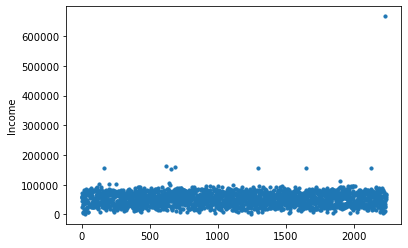

In [15]:
plt.scatter(y=data['Income'],x=data.index,s=10)
plt.ylabel('Income')

In [16]:
len(data[data['Income']<20000])

127

There are very few points in the data which lie above the 100000. Out of 2216, only 13 are greater than 100000, so we can remove them without much affecting the data.  We can also see clearly that most of the points are between 200000 and 800000.

Text(0, 0.5, 'Income')

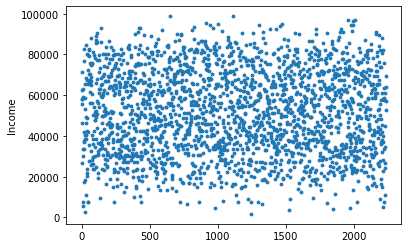

In [17]:
data = data[data['Income']<100000]
plt.scatter(y=data['Income'],x=data.index,s=8)
plt.ylabel('Income')

In [177]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

##  campaign

* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [18]:
acc = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()
acc

AcceptedCmp1    138
AcceptedCmp2     29
AcceptedCmp3    163
AcceptedCmp4    161
AcceptedCmp5    158
Response        329
dtype: int64

Things that could be concluded from the figure below is that the 2nd campaign has the least impact on the customer and the last campaign has the greatest impact on the customer. Almost twice the second-highest campaign.

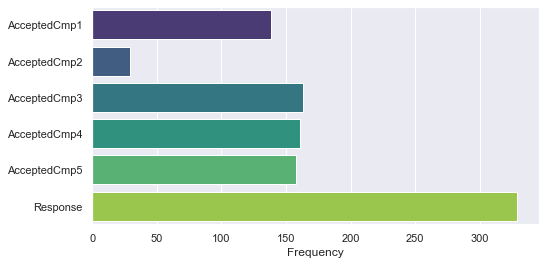

In [66]:
plt.figure(figsize=(8,4))
sns.barplot(y=acc.index,x=acc.values,palette='viridis')
plt.xlabel('Frequency')
plt.show()

### Year of birth

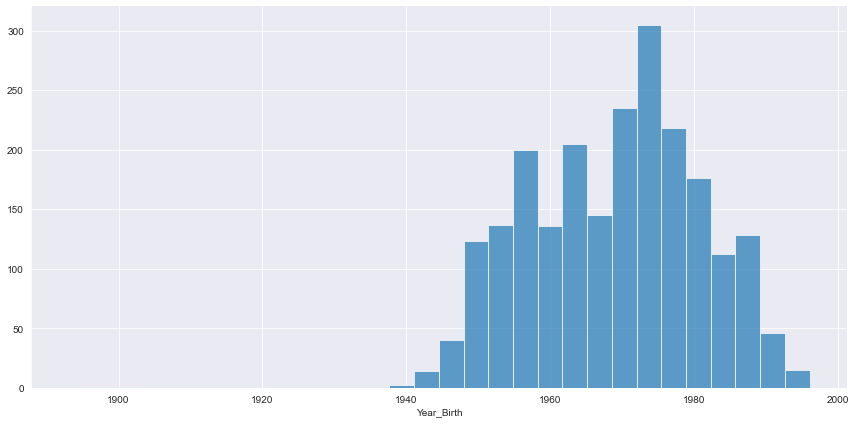

In [139]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,palette='viridis',size=6,aspect=2)
g = g.map(plt.hist,'Year_Birth',bins=30,alpha=0.7)

In [140]:
data['Year_Birth'].max()

1996

In [141]:
len(data[data['Year_Birth']<1940])

3

We can see that most of the customer's year of birth is between 1940 and 1996. Only 3 data points year of birth less than 1940. So we can remove these outliers.

In [19]:
data = data[data['Year_Birth']>1940]

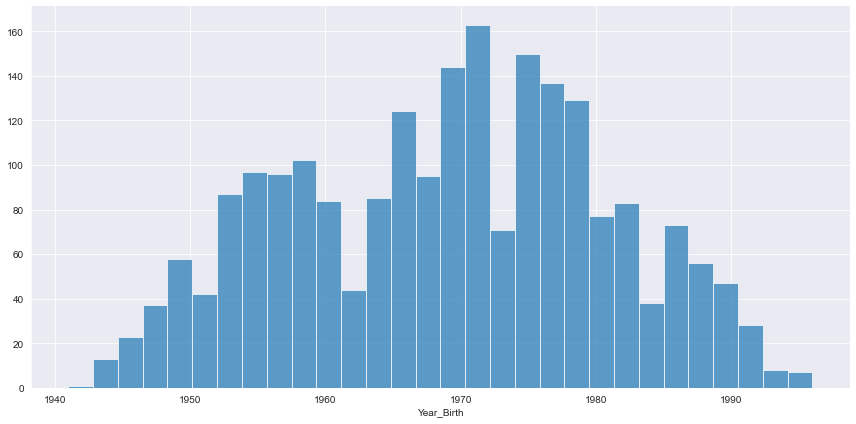

In [24]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,palette='viridis',size=6,aspect=2)
g = g.map(plt.hist,'Year_Birth',bins=30,alpha=0.7)

## Purchase 

* NumWebPurchases : Number of purchases made through the company’s web site   
* NumCatalogPurchases : Number of purchases made using a catalogue  
* NumStorePurchases : Number of purchases made directly in stores  
* NumWebVisitsMonth : Number of visits to company’s web site in the last month  
* NumDealsPurchases: Number of purchases made with a discount

In [83]:
pur = data[['NumCatalogPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases']].sum()
pur

NumCatalogPurchases     5806
NumWebPurchases         8994
NumStorePurchases      12800
NumWebVisitsMonth      11766
NumDealsPurchases       5114
dtype: int64

In [87]:
8994/11766*100

76.44059153493116

From the figure, we can conclude that most of the purchases were made from the store. We could also see that the conversion rate of customers visiting the website and purchasing it from there is pretty good. Around 76.4% of the people visiting the website are purchasing the product from there.

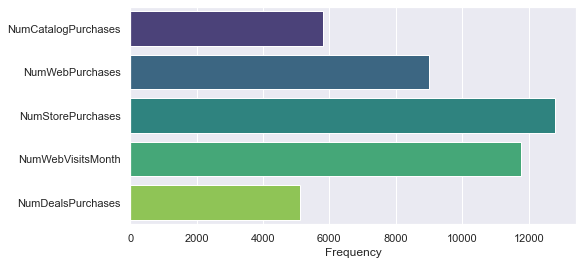

In [86]:
plt.figure(figsize=(8,4))
sns.barplot(y=pur.index,x=pur.values,palette='viridis')
plt.xlabel('Frequency')
plt.show()

### Qualifcation of the customers

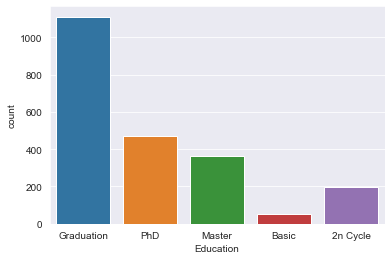

In [21]:
warnings.simplefilter("ignore")      
sns.countplot(data['Education'])
plt.show()

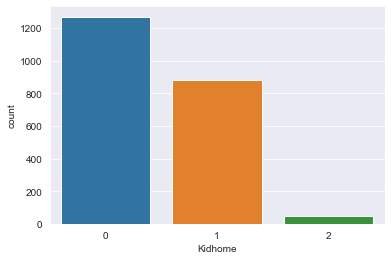

In [22]:
sns.countplot(data['Kidhome'])
plt.show()

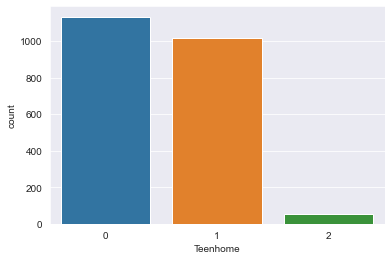

In [23]:
sns.countplot(data['Teenhome'])
plt.show()

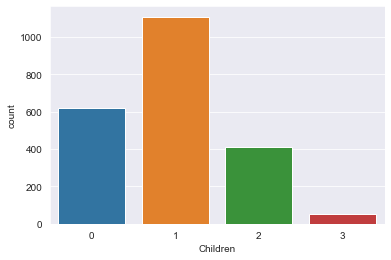

In [38]:
data['Children']= data['Kidhome']+data['Teenhome']
sns.countplot(data['Children'])
plt.show()

Most of our customers have 1 child in their home. So we should keep in mind this for a better outcome.

## Money Spent on different items

* MntWines: Amount spent on wine in last 2 years  
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

In [93]:
spent = data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()
spent

MntWines            673203
MntFruits            57982
MntMeatProducts     364297
MntFishProducts      83016
MntSweetProducts     59183
MntGoldProds         96813
dtype: int64

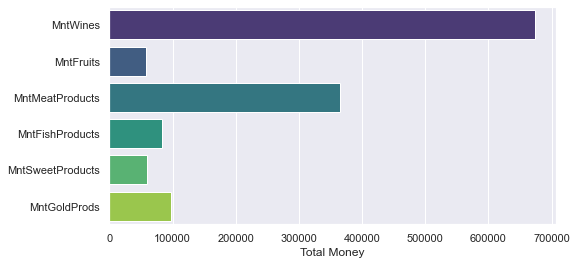

In [95]:
plt.figure(figsize=(8,4))
sns.barplot(y=spent.index,x=spent.values,palette='viridis')
plt.xlabel('Total Money')
plt.show()

## Complain made

As we can see that very few complaints are being made. Only 21 out of 2216. Thus in terms of complaining, we can say that our customers are satisfied with our products.

In [98]:
data['Complain'].sum()

21

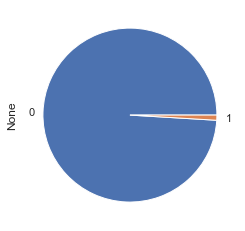

In [96]:
data.groupby('Complain').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(4,4)})

<AxesSubplot:xlabel='count', ylabel='Marital_Status'>

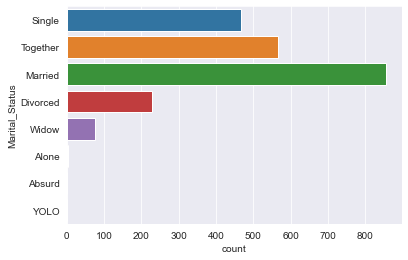

In [25]:
sns.countplot(y=data['Marital_Status'])

In [26]:
len(data[(data['Marital_Status']=='YOLO') | (data['Marital_Status']=='Alone') |(data['Marital_Status']=='Absurd')  ])

7

In [27]:
m=['YOLO','Alone','Absurd']
data = data[(data['Marital_Status']!='YOLO') & (data['Marital_Status']!='Alone') &(data['Marital_Status']!='Absurd')  ]

We can conclude from the diagram that most of our customers are married or together.

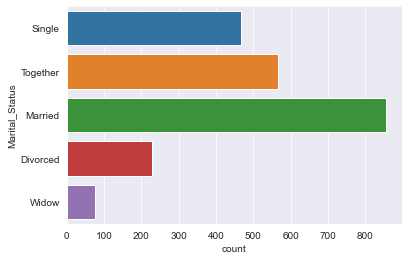

In [28]:
sns.countplot(y=data['Marital_Status'])
plt.show()

 Recency is the number of days since the customer's last purchase. We can see that the recency is almost uniformly distributed between 0 and 100.

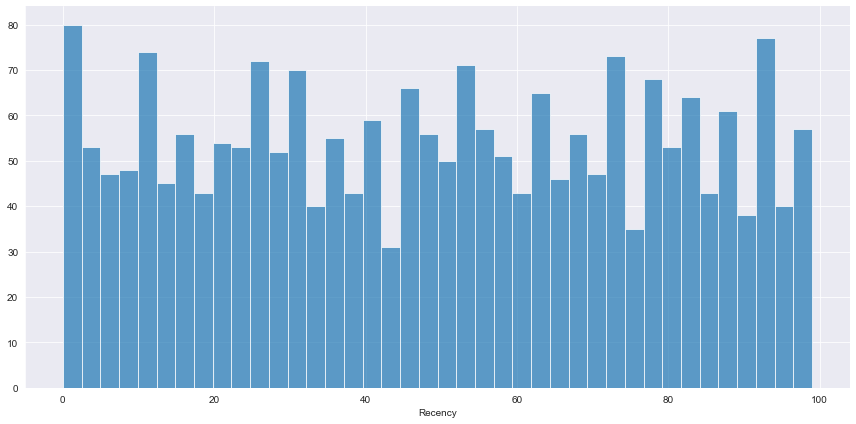

In [72]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,palette='viridis',size=6,aspect=2)
g = g.map(plt.hist,'Recency',bins=40,alpha=0.7)

## Data Preprocessing

In [29]:
data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [30]:
last_date = date(2014,10, 4)
data['Seniority']=pd.to_datetime(data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
data['Seniority'].head(10)

0    25.333333
1     7.000000
2    13.633333
3     7.866667
4     8.600000
5    13.000000
6    23.000000
7    17.133333
8    16.166667
9     6.833333
Name: Seniority, dtype: float64

In [31]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [32]:
dic = {'Graduation':0, 'PhD':1, 'Master':2, 'Basic':3, '2n Cycle':4}
data['Education'] = data['Education'].apply(lambda x : dic[x])
data['Education'].head(10)

0    0
1    0
2    0
3    0
4    1
5    2
6    0
7    1
8    1
9    1
Name: Education, dtype: int64

In [33]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [34]:
dic1 = {'Single':0, 'Together':1, 'Married':2, 'Divorced':3, 'Widow':4}
data['Marital_Status'] = data['Marital_Status'].apply(lambda x : dic1[x])
data['Marital_Status'].head(10)

0    0
1    0
2    1
3    1
4    2
5    1
6    3
7    2
8    1
9    1
Name: Marital_Status, dtype: int64

In [39]:
clustering_data=data[['Year_Birth','Education','Marital_Status','Income','Spending','Seniority','Children','Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']]
clustering_data.head()

,Year_Birth,Education,Marital_Status,Income,Spending,Seniority,Children,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,1957,0,0,58138.0,1617,25.333333,0,58,635,88,...,3,8,10,4,7,0,0,0,0,0
1,1954,0,0,46344.0,27,7.000000,2,38,11,1,...,2,1,1,2,5,0,0,0,0,0
2,1965,0,1,71613.0,776,13.633333,0,26,426,49,...,1,8,2,10,4,0,0,0,0,0
3,1984,0,1,26646.0,53,7.866667,1,26,11,4,...,2,2,0,4,6,0,0,0,0,0
4,1981,1,2,58293.0,422,8.600000,1,94,173,43,...,5,5,3,6,5,0,0,0,0,0


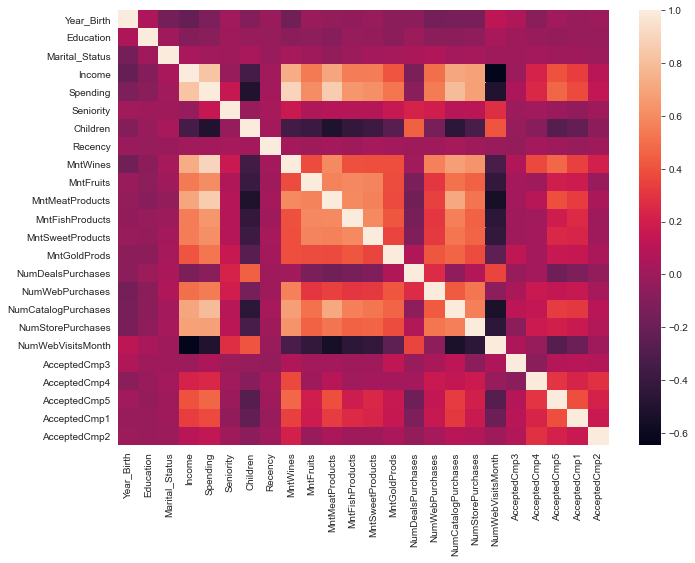

In [40]:
plt.figure(figsize=(11,8))
sns.heatmap(clustering_data.corr())
plt.show()

## Simple Clustering

First we will be clustering our data on just the spending nature of the customer, income and the Seniority of the customer. We will divide our data into four clusters.
 
* Stars customer: Old customers with high income and high spending nature.
* Neet Attention customer: New customers with below-average income and low spending nature. 
* High Potential customer: New customers with high income and high spending nature.
* Leaky Bucket customer: Old customers with below-average income and a low spending nature.

In [35]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture


scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

In [129]:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Standardization the data

We will standardize the data prior to performing cluster analysis. So that every feature will contributes equally in defining the clusters.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(clustering_data)
scaled_data = scaler.fit_transform(clustering_data)
scaled_data

array([[-1.01886133, -0.77916559, -1.42475889, ..., -0.27680467,
        -0.25819889, -0.11578992],
       [-1.27570531, -0.77916559, -1.42475889, ..., -0.27680467,
        -0.25819889, -0.11578992],
       [-0.33394405, -0.77916559, -0.46822857, ..., -0.27680467,
        -0.25819889, -0.11578992],
       ...,
       [ 1.03589052, -0.77916559,  1.44483207, ..., -0.27680467,
        -0.25819889, -0.11578992],
       [-1.10447599,  0.81108672, -0.46822857, ..., -0.27680467,
        -0.25819889, -0.11578992],
       [-1.27570531,  0.01596056,  0.48830175, ..., -0.27680467,
        -0.25819889, -0.11578992]])

## K Means Clustering

We will be using K Means an unsupervised algorithm to cluster customer data in 4 clusters.

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [44]:
kmeans.cluster_centers_

array([[-0.34472178, -0.0869547 ,  0.0931394 ,  0.24712099,  0.16186304,
         0.30651786,  0.32582328, -0.02897968,  0.41914307, -0.14723889,
        -0.16581372, -0.19335355, -0.15458742,  0.28721883,  0.85936408,
         0.860954  ,  0.10497926,  0.56853544,  0.26349694, -0.02495724,
         0.24858546, -0.26990846, -0.14100223, -0.02268225],
       [ 0.23030376,  0.10361226, -0.04550996, -0.82306578, -0.84674614,
        -0.18802574,  0.36507181,  0.0051826 , -0.78511228, -0.53535441,
        -0.6546135 , -0.55937653, -0.53598709, -0.55186793, -0.17539672,
        -0.74557271, -0.74406847, -0.8027625 ,  0.44176397, -0.00785393,
        -0.25136813, -0.27680467, -0.25413277, -0.09856133],
       [ 0.0473826 , -0.1059913 ,  0.059917  ,  1.44488501,  1.68607218,
        -0.00501527, -1.00043072,  0.02169329,  1.72574832,  0.69200133,
         1.38647949,  0.66898149,  0.88876968,  0.58200663, -0.65133304,
         0.48928304,  1.19328922,  0.72229505, -0.94161034,  0.28031176,
  

In [45]:
kmeans.labels_

array([3, 1, 3, ..., 0, 3, 1])

In [46]:
scaled_data.shape

(2192, 24)

## PCA

As our scaled data is of dimension (2192, 24). We can use PCA for dimensionality reduction to visualise the data in 2-d plane.

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [48]:
x_pca.shape

(2192, 2)

Text(0, 0.5, 'Second Principal Component')

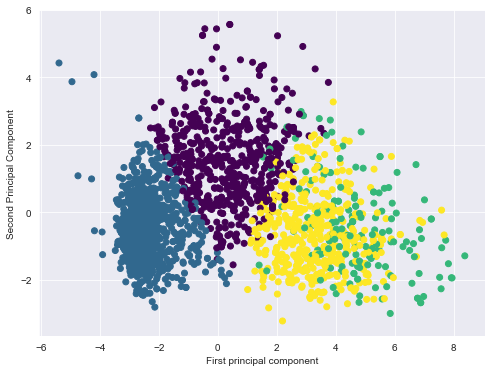

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=kmeans.labels_,cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Conclusion
Thus we can conclude from the above analysis is that :
* Around 94% of our customers have income in between 20 thousand and 1 lakh.
* The second campaign has the weakest impact on the customer and the last campaign has the greatest impact on the customer. Almost twice the second-highest campaign.
* Most of our customer's age lies between 40 to 60 years.
* Most of the purchases were made from the store(). We could also see that the conversion rate of customers visiting the website and purchasing it from there is pretty good. Around 76.4% of the people visiting the website are purchasing the product from there.
* Most of our customers have One child in their home(50%). So we should keep in mind this for a better outcome.
* Money spent by our customers on wine and meat products is very high.
* Only 21 out of 2216. Thus in terms of complaining, we can say that our customers are satisfied with our products.
* Most of our customers are married or together.
* Recency is almost uniformly distributed between 0 and 100.

## xgboost Classifier

We will be building a multinomial classification model on the promotion done by the company. We will use xgboost algorithm for this process.

In [53]:
X = data[['Year_Birth','Education','Marital_Status','Income','Spending','Seniority','Children','Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',]]
y = data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response']]

In [72]:
lst=[]
for i in range(len(y)):
    if y.iloc[i]["AcceptedCmp1"] == 1:
        lst.append(1)
    elif y.iloc[i]["AcceptedCmp2"] == 1:
        lst.append(2)
    elif y.iloc[i]["AcceptedCmp3"] == 1:
        lst.append(3)
    elif y.iloc[i]["AcceptedCmp4"] == 1:
        lst.append(4)
    elif y.iloc[i]["AcceptedCmp5"] == 1:
        lst.append(5)
    elif y.iloc[i]["Response"] == 1:
        lst.append(6)
    else :
        lst.append(0)
y=lst

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [75]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[10:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Checking Accuracy

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [78]:
print("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("onfusion matrix : ", confusion_matrix(y_test,y_pred))
print("lassification report : ", classification_report(y_test,y_pred))

Accuracy Score :  77.72727272727272
onfusion matrix :  [[154   1   0   5   2   0   2]
 [  6   5   0   0   0   1   0]
 [  0   0   1   0   0   0   0]
 [  8   1   0   4   1   0   0]
 [  3   1   0   0   3   0   0]
 [  4   2   0   0   1   1   0]
 [  9   0   0   1   1   0   3]]
lassification report :                precision    recall  f1-score   support

           0       0.84      0.94      0.89       164
           1       0.50      0.42      0.45        12
           2       1.00      1.00      1.00         1
           3       0.40      0.29      0.33        14
           4       0.38      0.43      0.40         7
           5       0.50      0.12      0.20         8
           6       0.60      0.21      0.32        14

    accuracy                           0.78       220
   macro avg       0.60      0.49      0.51       220
weighted avg       0.75      0.78      0.75       220



In [81]:
acc = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()
acc

AcceptedCmp1    137
AcceptedCmp2     29
AcceptedCmp3    162
AcceptedCmp4    161
AcceptedCmp5    156
Response        326
dtype: int64

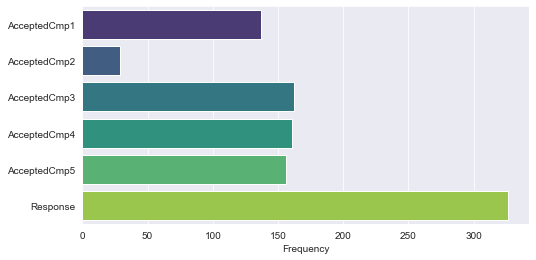

In [82]:
plt.figure(figsize=(8,4))
sns.barplot(y=acc.index,x=acc.values,palette='viridis')
plt.xlabel('Frequency')
plt.show()

## Recommendation

* The campaigns should be targetting middle age person as most of our customer's age lies between 40 to 60 years.
* Huge amount of money is spent by our customers on wine and meat products. So the campaigns must be focused on these products.
* All the campaigns should be having a sufficient impact on the customers.
* Most of our customers have One child in their home(50%). So the campaigns should be made focusing this.

Project Complete by - 
## Afham Fardeen